# MODEL CREATION FOR COLOR AND NUMBER DETECTION

Import libraries

In [59]:
import os
import glob
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


load in dataset Vcor and UTKFace 

In [13]:
car_train_dir= "C:/Users/Taarini/Desktop/Traffic_Car_Person/train"
car_val_dir= "C:/Users/Taarini/Desktop/Traffic_Car_Person/val"
car_test_dir= "C:/Users/Taarini/Desktop/Traffic_Car_Person/test"
face_gender_dir= "C:/Users/Taarini/Desktop/Traffic_Car_Person/utk_face"

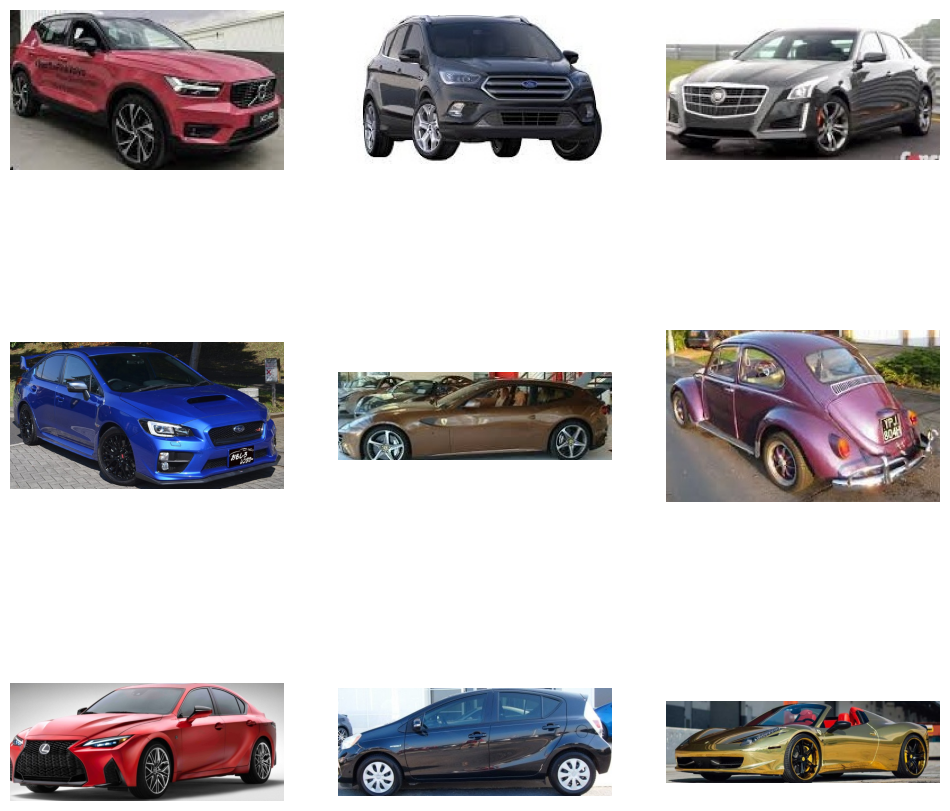

In [14]:
image_paths = glob.glob("train/**/**", recursive=True)

# Display 9 random images
plt.figure(figsize=(12, 12))
for i in range(9):
    image_path = random.choice(image_paths)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with matplotlib
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

Data Stratification and Pre-processing

In [20]:
img_size = (128, 128)
batch_size = 32

# Data augmentation and preprocessing 
car_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation and preprocessing 
face_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the data for validation
)


In [21]:
car_train_generator = car_datagen.flow_from_directory(
    car_train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

car_val_generator = car_datagen.flow_from_directory(
    car_val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

car_test_generator = car_datagen.flow_from_directory(
    car_test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


face_train_generator = face_datagen.flow_from_directory(
    face_gender_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

face_val_generator = face_datagen.flow_from_directory(
    face_gender_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.
Found 1556 images belonging to 15 classes.
Found 26791 images belonging to 2 classes.
Found 6697 images belonging to 2 classes.


In [23]:
car_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(car_train_generator.class_indices), activation='softmax')
])


car_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\Taarini\Documents\Python Scripts\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
car_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         3,855 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,290,927 (24.00 MB)

 Trainable params: 2,096,975 (8.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,193,952 (16.00 MB)

In [24]:
car_history = car_model.fit(
    car_train_generator,
    epochs=20,
    validation_data=car_val_generator
)



Epoch 1/20


C:\Users\Taarini\Documents\Python Scripts\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


228/228 ━━━━━━━━━━━━━━━━━━━━ 211s 868ms/step - accuracy: 0.2168 - loss: 2.2873 - val_accuracy: 0.5277 - val_loss: 1.3466
Epoch 2/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 121s 519ms/step - accuracy: 0.5125 - loss: 1.3711 - val_accuracy: 0.5729 - val_loss: 1.1681
Epoch 3/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 124s 538ms/step - accuracy: 0.5703 - loss: 1.2121 - val_accuracy: 0.6574 - val_loss: 1.0048
Epoch 4/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 132s 571ms/step - accuracy: 0.6587 - loss: 1.0112 - val_accuracy: 0.6645 - val_loss: 0.9661
Epoch 5/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 128s 552ms/step - accuracy: 0.6527 - loss: 0.9909 - val_accuracy: 0.7219 - val_loss: 0.8104
Epoch 6/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 124s 537ms/step - accuracy: 0.6963 - loss: 0.9051 - val_accuracy: 0.6787 - val_loss: 0.8334
Epoch 7/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 119s 514ms/step - accuracy: 0.6979 - loss: 0.8688 - val_accuracy: 0.6548 - val_loss: 0.9393
Epoch 8/20
228/228 ━━━━━━━━━━━━━━━━━━━━ 124s 536ms/step - accuracy: 0.7205 - loss: 0.81

In [25]:
car_model.evaluate(car_test_generator)

49/49 ━━━━━━━━━━━━━━━━━━━━ 28s 574ms/step - accuracy: 0.7138 - loss: 0.7855


[0.8092743158340454, 0.708226203918457]

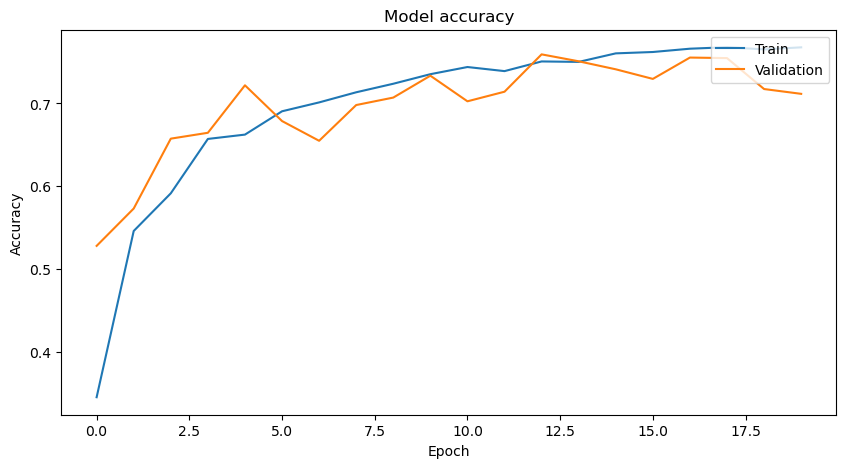

In [51]:
plt.figure(figsize=(10, 5))
plt.plot(car_history.history['accuracy'], label='Train')
plt.plot(car_history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

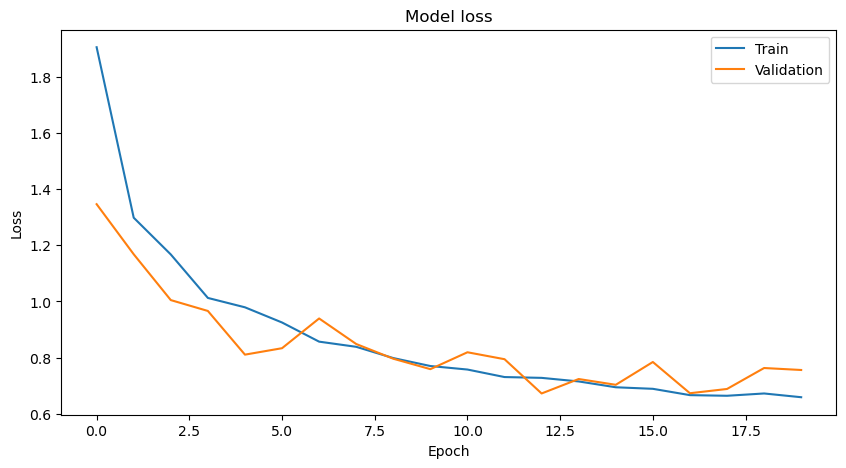

In [52]:
plt.figure(figsize=(10, 5))
plt.plot(car_history.history['loss'], label='Train')
plt.plot(car_history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [35]:
gender_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

gender_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



C:\Users\Taarini\Documents\Python Scripts\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
gender_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,093,377 (7.99 MB)

 Trainable params: 2,093,377 (7.99 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
gender_history = gender_model.fit(
    face_train_generator,
    epochs=20,
    validation_data=face_val_generator
)


Epoch 1/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1038s 1s/step - accuracy: 0.7101 - loss: 0.6101 - val_accuracy: 0.7079 - val_loss: 0.5948
Epoch 2/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 980s 1s/step - accuracy: 0.7100 - loss: 0.5980 - val_accuracy: 0.7079 - val_loss: 0.6029
Epoch 3/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 824s 980ms/step - accuracy: 0.7050 - loss: 0.5994 - val_accuracy: 0.7079 - val_loss: 0.6040
Epoch 4/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1162s 1s/step - accuracy: 0.7084 - loss: 0.5949 - val_accuracy: 0.7079 - val_loss: 0.6038
Epoch 5/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 746s 886ms/step - accuracy: 0.7043 - loss: 0.5977 - val_accuracy: 0.7079 - val_loss: 0.6116
Epoch 6/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 648s 771ms/step - accuracy: 0.7086 - loss: 0.5927 - val_accuracy: 0.7079 - val_loss: 0.6032
Epoch 7/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 789s 939ms/step - accuracy: 0.7039 - loss: 0.5951 - val_accuracy: 0.7079 - val_loss: 0.5997
Epoch 8/20
838/838 ━━━━━━━━━━━━━━━━━━━━ 1262s 2s/step - accuracy: 0.7069 - loss: 0.

In [38]:
gender_model.evaluate(face_val_generator)

210/210 ━━━━━━━━━━━━━━━━━━━━ 54s 256ms/step - accuracy: 0.6992 - loss: 0.6061


[0.6022079586982727, 0.7043452262878418]

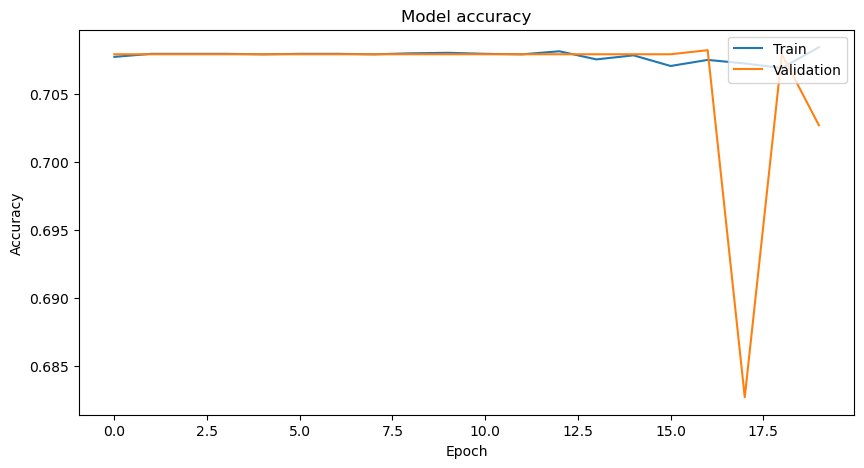

In [47]:
plt.figure(figsize=(10, 5))
plt.plot(gender_history.history['accuracy'], label='Train')
plt.plot(gender_history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.show()

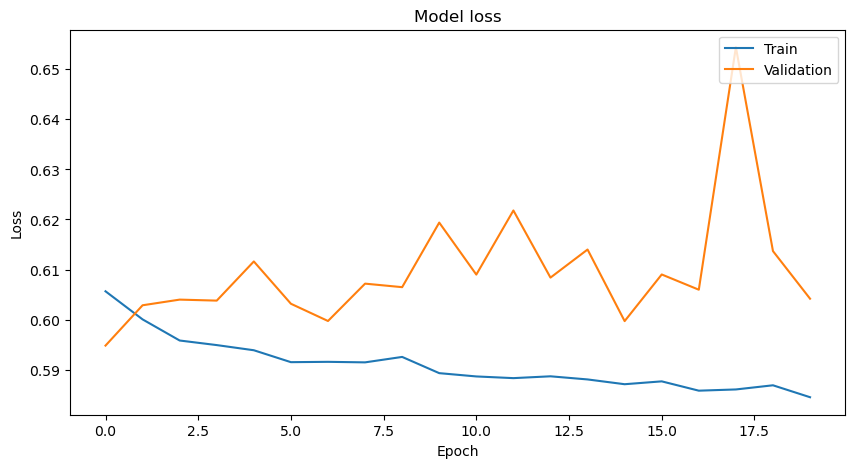

In [48]:

plt.figure(figsize=(10, 5))
plt.plot(gender_history.history['loss'], label='Train')
plt.plot(gender_history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

Load in the pre-trained OpenCV model for fine tuning the pre-trained dataset and saving on system run time

In [87]:
cv2.dnn.readNetFromCaffe('deploy.prototxt','mobilenet_iter_73000.caffemodel')

# Define the list of class labels MobileNet SSD was trained to detect
Class_labels = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant", "sheep",
           "sofa", "train", "tvmonitor"]

# Define random colors for each class
Colors = np.random.uniform(0, 255, size=(len(Class_labels), 3))

def detect_objects(image):
    (h, w) = image.shape[:2]
    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843, (300, 300), 127.5)
    net.setInput(blob)
    detections = net.forward()

    bounding_boxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.2:  # Minimum confidence threshold
            idx = int(detections[0, 0, i, 1])
            if Class_labels[idx] in ["car", "person"]:
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")
                label = Class_labels[idx]
                bounding_boxes.append((label, (startX, startY, endX - startX, endY - startY)))
    return bounding_boxes

In [88]:
def detect_car_color(image, model):
    try:
        image = cv2.resize(image, img_size)
    except Exception as e:
        print(f"Error in resizing image: {e}")
        return None
    image = np.expand_dims(image, axis=0)
    image = image / 255.0
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]
    
    class_labels = list(car_train_generator.class_indices.keys())
    car_color = class_labels[predicted_class]

    if car_color == 'red':
        car_color = 'blue'
    elif car_color == 'blue':
        car_color = 'red'

    return car_color

In [99]:
def count_cars_and_people(image_path, car_model, gender_model):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_path}")
        return [], 0, 0, 0

    car_count = 0
    male_count = 0
    female_count = 0
    car_colors = []

    bounding_boxes = detect_objects(image)

    for box in bounding_boxes:
        label, (x, y, w, h) = box
        cropped_image = image[y:y+h, x:x+w]

        if label == 'car':
            car_count += 1
            car_color = detect_car_color(cropped_image, car_model)
            if car_color is not None:
                car_colors.append(car_color)
        elif label == 'person':
            cropped_image = cv2.resize(cropped_image, img_size)
            cropped_image = np.expand_dims(cropped_image, axis=0)
            cropped_image = cropped_image / 255.0
            prediction = gender_model.predict(cropped_image)
            if prediction < 0.5:
                male_count += 1
            else:
                female_count += 1

    return car_colors, car_count, male_count, female_count



In [100]:
# Example usage   (Try this code to test the efficacy of the overall model)
image_path = "C:/Users/Taarini/Desktop/Traffic_Car_Person/testimage.jpg"
car_colors, car_count, male_count, female_count = count_cars_and_people(image_path, car_model, gender_model)

print("Colors of the cars detected:", car_colors)
print("Number of cars detected:", car_count)
print("Number of males detected:", male_count)
print("Number of females detected:", female_count)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Error in resizing image: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Colors of the cars detected: ['grey', 'tan', 'red']
Number of cars detected: 4
Number of males detected: 0
Number of females detected: 0


In [92]:
class_labels = list(car_train_generator.class_indices.keys())
np.save('car_class_labels.npy', class_labels)

In [83]:
car_model.save('car_color_model.keras')
gender_model.save('gender_classification_model.keras')


In [84]:
car_model_json = car_model.to_json()
with open("car_color_model.json", "w") as json_file:
    json_file.write(car_model_json)

In [86]:
gender_model_json = gender_model.to_json()
with open("gender_classification_model.json", "w") as json_file:
    json_file.write(gender_model_json)
